<a href="https://colab.research.google.com/github/TZ2024/587HW2/blob/main/587_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#2

import math

def manhattan_distance(vector_a, vector_b):
    return sum(abs(a-b) for a, b in zip(vector_a, vector_b))

def euclidean_distance(vector_a, vector_b):
    return math.sqrt(sum((a-b)**2 for a, b in zip(vector_a, vector_b)))

# Example vectors of length 3
vector_a = [1, 2, 3]
vector_b = [4, 5, 6]

# Calculating distances
manhattan_dist = manhattan_distance(vector_a, vector_b)
euclidean_dist = euclidean_distance(vector_a, vector_b)

print(f"Manhattan Distance: {manhattan_dist}")
print(f"Euclidean Distance: {euclidean_dist}")


Manhattan Distance: 9
Euclidean Distance: 5.196152422706632


In [4]:
#5
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
file_path = '/content/drive/MyDrive/DATA/metabolite.csv'

df = pd.read_csv(file_path)

threshold = len(df) * 0.75

df = df.dropna(thresh=threshold, axis=1)

for column in df.columns:
    if df[column].isnull().any():
        df[column].fillna(df[column].median(), inplace=True)


cleaned_file_path = '/content/drive/My Drive/cleaned_metabolite.csv'
df.to_csv(cleaned_file_path, index=False)

print("Cleaning process completed. The cleaned dataset is saved as 'cleaned_metabolite.csv'.")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Cleaning process completed. The cleaned dataset is saved as 'cleaned_metabolite.csv'.


Mounted at /content/drive


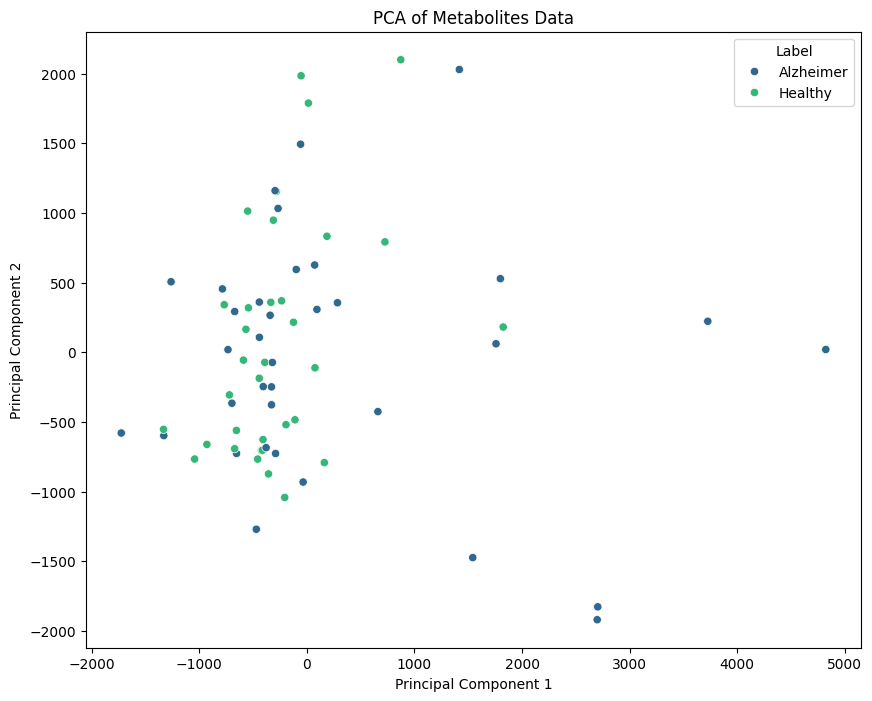

In [5]:
#6
from google.colab import drive
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Load the data
file_path = '/content/drive/MyDrive/DATA/metabolite.csv'
df = pd.read_csv(file_path)

# Prepare the data by selecting numeric columns and excluding the 'Label' column
X = df.drop('Label', axis=1).select_dtypes(include='number')
y = df['Label']

# Handle missing values by imputing them with the mean of each column
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imputed = imputer.fit_transform(X)

# Apply PCA on the imputed data to reduce to the first two principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_imputed)

# Convert the PCA results to a DataFrame for visualization
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Label'] = y.values

# Create the scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Label', palette='viridis')
plt.title('PCA of Metabolites Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Label')
plt.show()
